SCINet: Time Series Modeling and Forecasting with
Sample Convolution and Interaction
![alt text](image.png)

In [1]:
import pandas as pd

In [2]:
df =  pd.read_csv(r"datasets\ETT-data\train.csv")

In [3]:
past_values = list(df[-96:]["Value"])

In [4]:
past_values

[832.1604695638022,
 850.4932373046876,
 841.3852294921876,
 847.8493815104168,
 762.9227498372396,
 743.6251871744793,
 820.4137451171875,
 772.9634887695313,
 740.5656616210939,
 785.649637858073,
 782.8858805338543,
 741.3330688476562,
 752.616768391927,
 760.1485758463543,
 775.4227416992188,
 873.449178059896,
 833.8760986328126,
 778.9099853515625,
 769.1584554036458,
 853.2401977539063,
 821.2312052408855,
 885.6831176757813,
 840.6951578776042,
 844.8212443033855,
 844.8942260742189,
 960.7484334309902,
 1045.8478678385425,
 1046.219604492188,
 1086.883048502607,
 1088.784277343752,
 1051.937817382814,
 1082.5131917317728,
 1120.551798502606,
 1060.4615152994809,
 1081.152905273438,
 1091.1328938802096,
 1079.34412434896,
 1106.248706054688,
 1094.4203938802095,
 1065.2117431640631,
 1069.67530110677,
 1078.4713419596376,
 1061.75506998698,
 1029.9602539062494,
 1008.4724812825528,
 1048.6665201822923,
 1029.6210489908856,
 1028.0692830403657,
 991.9049601236984,
 955.648486328

In [2]:
!python run_ETTh.py --data MyData --features S  --seq_len 96 --label_len 48 --pred_len 96 --hidden-size 128 --stacks 1 --levels 3 --lr 0.0005 --batch_size 256  --dropout 0.5 --train_epochs 15 --model_name withpredlen96

^C


In [137]:
import numpy as np
import pandas as pd
import torch
import argparse
from experiments.exp_ETTh import Exp_ETTh
from sklearn.preprocessing import StandardScaler
import os

# Load your dataset
df = pd.read_csv(r'datasets\ETT-data\train.csv')

# Extract the last 96 values from the 'Value' column
past_values = list(df[-96:]["Value"])

# Define the model settings
args = {
    'model': 'SCINet',
    'data': 'MyData',
    'features': 'S',
    'seq_len': 96,
    'label_len': 48,
    'pred_len': 96,
    'hidden_size': 8,
    'stacks': 1,
    'levels': 3,
    'lr': 0.0005,
    'batch_size': 128,
    'dropout': 0.5,
    'inverse': False,
    'use_gpu': True,
    'checkpoints': 'exp/ETT_checkpoints/',
    'model_name': 'SCINet',
    'evaluate': True,
    'decompose': False,  # Add the missing 'decompose' attribute
    'num_decoder_layer': 1,  # Add the missing 'num_decoder_layer' attribute
    'concat_len': 0,  # Add the missing 'concat_len' attribute
    'groups': 1,  # Add the missing 'groups' attribute
    'kernel': 5,  # Add the missing 'kernel' attribute
    'single_step_output_One': 0,  # Add the missing 'single_step_output_One' attribute
    'positionalEcoding': False,  # Add the missing 'positionalEcoding' attribute
    'RIN': False  # Add the missing 'RIN' attribute
}

# Convert args to a namespace
args = argparse.Namespace(**args)

# Initialize the experiment
exp = Exp_ETTh(args)

# Load the trained model
setting = 'SCINet_MyData_ftS_sl96_ll48_pl96_lr0.0005_bs128_hid8.0_s1_l3_dp0.5_invFalse_itr0'
path = os.path.join(args.checkpoints, setting)
best_model_path = path + '/' + 'checkpoint.pth'
exp.model.load_state_dict(torch.load(best_model_path))
exp.model.eval()

# Convert the input data to a tensor and change its type to double
input_data = torch.tensor(past_values).double().unsqueeze(0).unsqueeze(-1)  # Shape: (1, seq_len, 1)

# Move the input data to the GPU if available
if args.use_gpu:
    input_data = input_data.cuda()

# Make predictions
with torch.no_grad():
    pred = exp.model(input_data)

SCINet(
  (blocks1): EncoderTree(
    (SCINet_Tree): SCINet_Tree(
      (workingblock): LevelSCINet(
        (interact): InteractorLevel(
          (level): Interactor(
            (split): Splitting()
            (phi): Sequential(
              (0): ReplicationPad1d((3, 3))
              (1): Conv1d(1, 8, kernel_size=(5,), stride=(1,))
              (2): LeakyReLU(negative_slope=0.01, inplace=True)
              (3): Dropout(p=0.5, inplace=False)
              (4): Conv1d(8, 1, kernel_size=(3,), stride=(1,))
              (5): Tanh()
            )
            (psi): Sequential(
              (0): ReplicationPad1d((3, 3))
              (1): Conv1d(1, 8, kernel_size=(5,), stride=(1,))
              (2): LeakyReLU(negative_slope=0.01, inplace=True)
              (3): Dropout(p=0.5, inplace=False)
              (4): Conv1d(8, 1, kernel_size=(3,), stride=(1,))
              (5): Tanh()
            )
            (P): Sequential(
              (0): ReplicationPad1d((3, 3))
              (1)

In [21]:
pred = pred.cpu().numpy().flatten()

In [24]:
actual = pd.read_csv(r"C:\workarea\NCA\SCINet\datasets\ETT-data\test.csv")

In [151]:
mae = np.mean(np.abs(pred - actual))
print("Mean Absolute Error:", mae)

Mean Absolute Error: 49.81139607453056


In [152]:
import numpy as np

# Convert actual and pred to numpy arrays, if they aren't already
actual_arr = np.array(actual)
pred_arr = np.array(pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual_arr - pred_arr) / actual_arr)) * 100

print("MAPE: {:.2f}%".format(mape))

MAPE: 5.34%


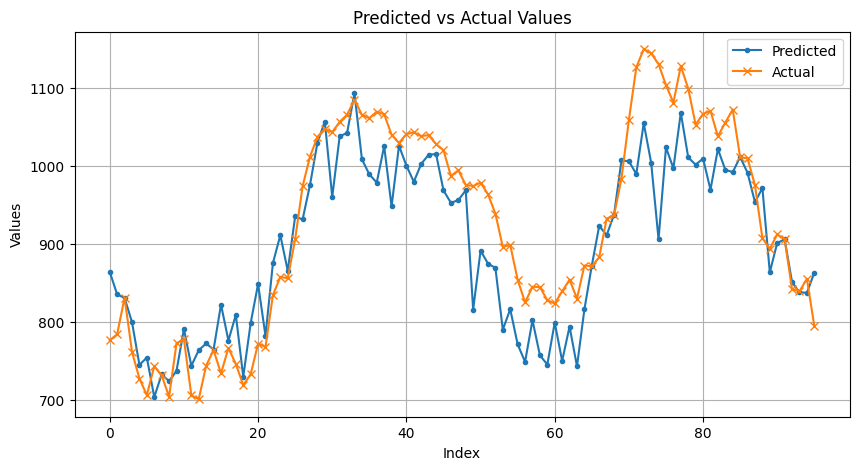

In [145]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(pred, label='Predicted', marker='.')
plt.plot(actual, label='Actual', marker='x')
plt.title('Predicted vs Actual Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [153]:
import numpy as np
import pandas as pd
import torch
import argparse
from experiments.exp_ETTh import Exp_ETTh
from sklearn.preprocessing import StandardScaler
import os

# Load your dataset
df = pd.read_csv(r'datasets\ETT-data\train.csv')

# Extract the last 96 values from the 'Value' column
past_values = list(df[-96:]["Value"])

# Define the model settings
args = {
    'model': 'SCINet',
    'data': 'MyData',
    'features': 'S',
    'seq_len': 96,
    'label_len': 48,
    'pred_len': 96,
    'hidden_size': 128,
    'stacks': 1,
    'levels': 3,
    'lr': 0.0005,
    'batch_size': 256,
    'dropout': 0.5,
    'inverse': False,
    'use_gpu': True,
    'checkpoints': 'exp/ETT_checkpoints/',
    'model_name': 'SCINet',
    'evaluate': True,
    'decompose': False,  # Add the missing 'decompose' attribute
    'num_decoder_layer': 1,  # Add the missing 'num_decoder_layer' attribute
    'concat_len': 0,  # Add the missing 'concat_len' attribute
    'groups': 1,  # Add the missing 'groups' attribute
    'kernel': 5,  # Add the missing 'kernel' attribute
    'single_step_output_One': 0,  # Add the missing 'single_step_output_One' attribute
    'positionalEcoding': False,  # Add the missing 'positionalEcoding' attribute
    'RIN': False  # Add the missing 'RIN' attribute
}

# Convert args to a namespace
args = argparse.Namespace(**args)

# Initialize the experiment
exp = Exp_ETTh(args)

# Load the trained model
setting = 'SCINet_MyData_ftS_sl96_ll48_pl96_lr0.0005_bs256_hid128.0_s1_l3_dp0.5_invFalse_itr0'
path = os.path.join(args.checkpoints, setting)
best_model_path = path + '/' + 'checkpoint.pth'
exp.model.load_state_dict(torch.load(best_model_path))
exp.model.eval()

# Convert the input data to a tensor and change its type to double
input_data = torch.tensor(past_values).double().unsqueeze(0).unsqueeze(-1)  # Shape: (1, seq_len, 1)

# Move the input data to the GPU if available
if args.use_gpu:
    input_data = input_data.cuda()

# Make predictions
with torch.no_grad():
    pred = exp.model(input_data)

SCINet(
  (blocks1): EncoderTree(
    (SCINet_Tree): SCINet_Tree(
      (workingblock): LevelSCINet(
        (interact): InteractorLevel(
          (level): Interactor(
            (split): Splitting()
            (phi): Sequential(
              (0): ReplicationPad1d((3, 3))
              (1): Conv1d(1, 128, kernel_size=(5,), stride=(1,))
              (2): LeakyReLU(negative_slope=0.01, inplace=True)
              (3): Dropout(p=0.5, inplace=False)
              (4): Conv1d(128, 1, kernel_size=(3,), stride=(1,))
              (5): Tanh()
            )
            (psi): Sequential(
              (0): ReplicationPad1d((3, 3))
              (1): Conv1d(1, 128, kernel_size=(5,), stride=(1,))
              (2): LeakyReLU(negative_slope=0.01, inplace=True)
              (3): Dropout(p=0.5, inplace=False)
              (4): Conv1d(128, 1, kernel_size=(3,), stride=(1,))
              (5): Tanh()
            )
            (P): Sequential(
              (0): ReplicationPad1d((3, 3))
         

In [154]:
pred = pred.cpu().numpy().flatten()

In [156]:
mae = np.mean(np.abs(pred - actual))
print("Mean Absolute Error:", mae)
import numpy as np

# Convert actual and pred to numpy arrays, if they aren't already
actual_arr = np.array(actual)
pred_arr = np.array(pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual_arr - pred_arr) / actual_arr)) * 100

print("MAPE: {:.2f}%".format(mape))

MAPE: 6.44%


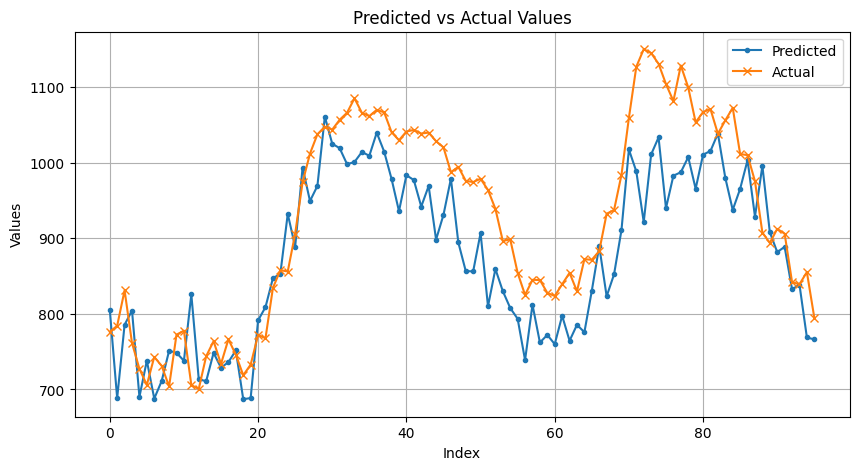

In [157]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(pred, label='Predicted', marker='.')
plt.plot(actual, label='Actual', marker='x')
plt.title('Predicted vs Actual Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [159]:
import numpy as np
import pandas as pd
import torch
import argparse
from experiments.exp_ETTh import Exp_ETTh
from sklearn.preprocessing import StandardScaler
import os

# Load your dataset
df = pd.read_csv(r'datasets\ETT-data\train.csv')

# Extract the last 96 values from the 'Value' column
past_values = list(df[-96:]["Value"])

# Define the model settings
args = {
    'model': 'SCINet',
    'data': 'MyData',
    'features': 'S',
    'seq_len': 96,
    'label_len': 48,
    'pred_len': 96,
    'hidden_size': 64,
    'stacks': 1,
    'levels': 3,
    'lr': 0.0005,
    'batch_size': 64,
    'dropout': 0.5,
    'inverse': False,
    'use_gpu': True,
    'checkpoints': 'exp/ETT_checkpoints/',
    'model_name': 'SCINet',
    'evaluate': True,
    'decompose': False,  # Add the missing 'decompose' attribute
    'num_decoder_layer': 1,  # Add the missing 'num_decoder_layer' attribute
    'concat_len': 0,  # Add the missing 'concat_len' attribute
    'groups': 1,  # Add the missing 'groups' attribute
    'kernel': 5,  # Add the missing 'kernel' attribute
    'single_step_output_One': 0,  # Add the missing 'single_step_output_One' attribute
    'positionalEcoding': False,  # Add the missing 'positionalEcoding' attribute
    'RIN': False  # Add the missing 'RIN' attribute
}

# Convert args to a namespace
args = argparse.Namespace(**args)

# Initialize the experiment
exp = Exp_ETTh(args)

# Load the trained model
setting = 'SCINet_MyData_ftS_sl96_ll48_pl96_lr0.0005_bs64_hid64.0_s1_l3_dp0.5_invFalse_itr0'
path = os.path.join(args.checkpoints, setting)
best_model_path = path + '/' + 'checkpoint.pth'
exp.model.load_state_dict(torch.load(best_model_path))
exp.model.eval()

# Convert the input data to a tensor and change its type to double
input_data = torch.tensor(past_values).double().unsqueeze(0).unsqueeze(-1)  # Shape: (1, seq_len, 1)

# Move the input data to the GPU if available
if args.use_gpu:
    input_data = input_data.cuda()

# Make predictions
with torch.no_grad():
    pred = exp.model(input_data)

SCINet(
  (blocks1): EncoderTree(
    (SCINet_Tree): SCINet_Tree(
      (workingblock): LevelSCINet(
        (interact): InteractorLevel(
          (level): Interactor(
            (split): Splitting()
            (phi): Sequential(
              (0): ReplicationPad1d((3, 3))
              (1): Conv1d(1, 64, kernel_size=(5,), stride=(1,))
              (2): LeakyReLU(negative_slope=0.01, inplace=True)
              (3): Dropout(p=0.5, inplace=False)
              (4): Conv1d(64, 1, kernel_size=(3,), stride=(1,))
              (5): Tanh()
            )
            (psi): Sequential(
              (0): ReplicationPad1d((3, 3))
              (1): Conv1d(1, 64, kernel_size=(5,), stride=(1,))
              (2): LeakyReLU(negative_slope=0.01, inplace=True)
              (3): Dropout(p=0.5, inplace=False)
              (4): Conv1d(64, 1, kernel_size=(3,), stride=(1,))
              (5): Tanh()
            )
            (P): Sequential(
              (0): ReplicationPad1d((3, 3))
             

In [160]:
pred = pred.cpu().numpy().flatten()

In [161]:
mae = np.mean(np.abs(pred - actual))
print("Mean Absolute Error:", mae)
import numpy as np

# Convert actual and pred to numpy arrays, if they aren't already
actual_arr = np.array(actual)
pred_arr = np.array(pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual_arr - pred_arr) / actual_arr)) * 100

print("MAPE: {:.2f}%".format(mape))

Mean Absolute Error: 118.40826756506569
MAPE: 13.00%


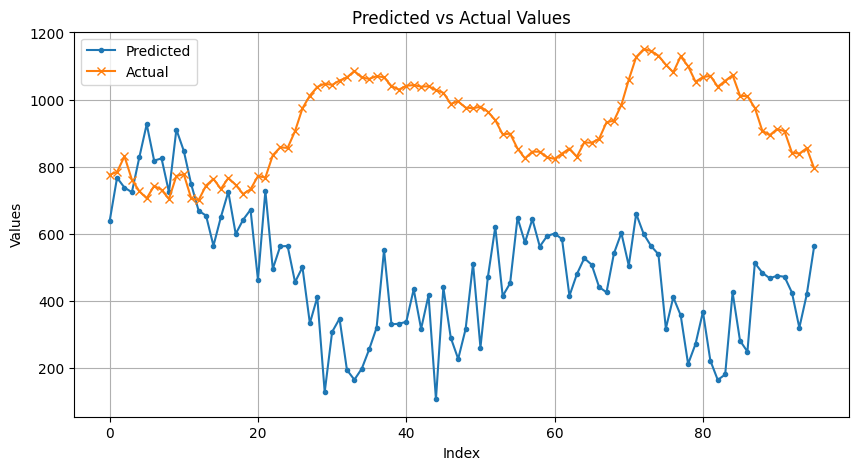

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(pred, label='Predicted', marker='.')
plt.plot(actual, label='Actual', marker='x')
plt.title('Predicted vs Actual Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [169]:
import numpy as np
import pandas as pd
import torch
import argparse
from experiments.exp_ETTh import Exp_ETTh
from sklearn.preprocessing import StandardScaler
import os

# Load your dataset
df = pd.read_csv(r'datasets\ETT-data\train.csv')

# Extract the last 96 values from the 'Value' column
past_values = list(df[-96:]["Value"])

# Define the model settings
args = {
    'model': 'SCINet',
    'data': 'MyData',
    'features': 'S',
    'seq_len': 96,
    'label_len': 48,
    'pred_len': 168,
    'hidden_size': 64,
    'stacks': 1,
    'levels': 3,
    'lr': 0.0005,
    'batch_size': 64,
    'dropout': 0.5,
    'inverse': False,
    'use_gpu': True,
    'checkpoints': 'exp/ETT_checkpoints/',
    'model_name': 'SCINet',
    'evaluate': True,
    'decompose': False,  # Add the missing 'decompose' attribute
    'num_decoder_layer': 1,  # Add the missing 'num_decoder_layer' attribute
    'concat_len': 0,  # Add the missing 'concat_len' attribute
    'groups': 1,  # Add the missing 'groups' attribute
    'kernel': 5,  # Add the missing 'kernel' attribute
    'single_step_output_One': 0,  # Add the missing 'single_step_output_One' attribute
    'positionalEcoding': False,  # Add the missing 'positionalEcoding' attribute
    'RIN': False  # Add the missing 'RIN' attribute
}

# Convert args to a namespace
args = argparse.Namespace(**args)

# Initialize the experiment
exp = Exp_ETTh(args)

# Load the trained model
setting = 'SCINet_MyData_ftS_sl96_ll48_pl168_lr0.0005_bs64_hid64.0_s1_l3_dp0.5_invFalse_itr0'
path = os.path.join(args.checkpoints, setting)
best_model_path = path + '/' + 'checkpoint.pth'
exp.model.load_state_dict(torch.load(best_model_path))
exp.model.eval()

# Convert the input data to a tensor and change its type to double
input_data = torch.tensor(past_values).double().unsqueeze(0).unsqueeze(-1)  # Shape: (1, seq_len, 1)

# Move the input data to the GPU if available
if args.use_gpu:
    input_data = input_data.cuda()

# Make predictions
with torch.no_grad():
    pred = exp.model(input_data)

SCINet(
  (blocks1): EncoderTree(
    (SCINet_Tree): SCINet_Tree(
      (workingblock): LevelSCINet(
        (interact): InteractorLevel(
          (level): Interactor(
            (split): Splitting()
            (phi): Sequential(
              (0): ReplicationPad1d((3, 3))
              (1): Conv1d(1, 64, kernel_size=(5,), stride=(1,))
              (2): LeakyReLU(negative_slope=0.01, inplace=True)
              (3): Dropout(p=0.5, inplace=False)
              (4): Conv1d(64, 1, kernel_size=(3,), stride=(1,))
              (5): Tanh()
            )
            (psi): Sequential(
              (0): ReplicationPad1d((3, 3))
              (1): Conv1d(1, 64, kernel_size=(5,), stride=(1,))
              (2): LeakyReLU(negative_slope=0.01, inplace=True)
              (3): Dropout(p=0.5, inplace=False)
              (4): Conv1d(64, 1, kernel_size=(3,), stride=(1,))
              (5): Tanh()
            )
            (P): Sequential(
              (0): ReplicationPad1d((3, 3))
             

In [9]:
pred = pred.cpu().numpy().flatten()

In [7]:
actual = pd.read_csv(r"C:\workarea\NCA\SCINet\datasets\ETT-data\test.csv")

In [25]:
actual = actual[72:168]["Value"]

In [5]:
print(len(actual))

96


In [26]:
actual = actual.values

In [27]:
pred = pred[72:]

In [28]:
len(pred),len(actual)

(96, 96)

In [11]:
pred

array([], dtype=float64)

In [12]:
print(len(pred),len(actual))

0 96


In [201]:
pred

array([841.46994895, 832.45848991, 795.62347599, 828.62075846,
       850.43632914, 867.56738392, 800.42153042, 828.46018995,
       749.55099421, 784.49024344, 815.33906376, 818.35428011,
       793.78536678, 810.63372213, 730.13674827, 764.79429551,
       748.29277129, 723.74673866, 697.71438163, 631.31016337,
       626.95018668, 657.67718813, 561.72971703, 575.24640232,
       579.75768644, 510.34137851, 613.83650978, 481.80667623,
       488.1328171 , 508.99398299, 527.71799108, 509.26088029,
       455.91452186, 478.07342961, 462.0823148 , 428.74838527,
       508.78512378, 510.59711368, 490.44903081, 536.39695897,
       554.64158754, 474.05107476, 546.38627352, 501.61424454,
       541.88790174, 562.17670047, 583.36080211, 598.46256516,
       606.68417477, 632.11942179, 647.99819631, 661.70850826,
       725.96828344, 692.29109007, 731.6448649 , 751.31283379,
       767.79745763, 686.4904764 , 776.39437169, 756.15564437,
       775.96198051, 731.59394364, 709.64046963, 716.98

In [204]:
actual

array([ 776.17600098,  784.15910238,  831.02720947,  761.41762695,
        727.19557292,  705.91672363,  742.91724854,  731.15759277,
        703.92777913,  772.39541016,  777.5791626 ,  705.67888184,
        700.61351318,  743.84194336,  763.77725423,  733.65282389,
        766.33867594,  745.86143392,  718.72399089,  732.78632813,
        771.93227132,  767.71901449,  834.17230632,  857.72945964,
        855.94801025,  905.97368978,  973.88657633, 1011.97256673,
       1037.48062744, 1047.46903483, 1043.67711589, 1056.65983887,
       1066.01038411, 1085.08216146, 1065.77565104, 1061.57349447,
       1069.77157389, 1066.49719238, 1040.18570964, 1029.60391032,
       1041.09890951, 1043.21276449, 1038.49634196, 1039.66499023,
       1028.32463786, 1020.11236979,  987.3089152 ,  994.4226888 ,
        975.9449585 ,  974.23501383,  978.67086182,  963.78498535,
        938.81840413,  896.25137126,  898.52626953,  854.08286947,
        824.98013102,  844.90026855,  844.71536458,  827.69296

In [13]:
actual

array([1641.369344, 1642.849194, 1630.928255, 1604.265112, 1584.645076,
       1576.707178, 1550.307072, 1548.221191, 1549.743905, 1531.327344,
       1522.872233, 1515.71486 , 1521.179663, 1513.848942, 1484.449609,
       1466.887451, 1450.648055, 1448.199276, 1446.597917, 1435.989884,
       1410.449976, 1392.640519, 1376.940552, 1346.732886, 1341.143107,
       1333.573527, 1342.647876, 1328.245174, 1354.133024, 1344.452979,
       1322.96215 , 1323.950146, 1362.754948, 1396.549121, 1363.998747,
       1351.54515 , 1358.449259, 1351.862541, 1361.691423, 1365.145785,
       1374.721549, 1401.866024, 1421.017163, 1415.036369, 1423.570646,
       1416.955949, 1419.049349, 1433.686092, 1433.190527, 1426.918962,
       1436.790942, 1406.433521, 1411.550309, 1422.320736, 1416.345174,
       1396.970947, 1369.059481, 1366.744206, 1372.607943, 1324.849691,
       1340.806413, 1357.172217, 1318.485791, 1314.106836, 1305.265869,
       1284.807633, 1270.83999 , 1267.832682, 1273.013086, 1238.

In [14]:
pred

array([1881.3446511 , 1757.6374058 , 1791.06898533, 1815.01722571,
       1751.42877424, 1606.96994287, 1649.52752239, 1666.37177524,
       1640.42599139, 1586.58285171, 1611.17449957, 1570.00445459,
       1594.81591431, 1548.22318929, 1551.87679229, 1550.19497356,
       1584.22247899, 1660.56693194, 1574.9037386 , 1532.16558654,
       1514.55746822, 1487.49187349, 1453.48778977, 1437.3878128 ,
       1455.80720046, 1458.35919465, 1402.84255713, 1400.63653743,
       1437.37941926, 1390.18875858, 1422.33495749, 1464.70735721,
       1373.87833671, 1475.90633852, 1476.79674778, 1405.92407639,
       1465.00057596, 1463.48307209, 1516.98772497, 1515.47754232,
       1538.76705934, 1554.44609338, 1600.27686584, 1645.67793447,
       1682.99833894, 1642.92353096, 1674.81376227, 1668.67762486,
       1678.4108454 , 1657.55129541, 1725.3040277 , 1676.79207945,
       1660.58227943, 1723.91439362, 1714.70535229, 1770.36083947,
       1689.35428393, 1838.85603241, 1799.78170686, 1833.21235

In [29]:
mae = np.mean(np.abs(pred - actual))
print("Mean Absolute Error:", mae)
import numpy as np

# Convert actual and pred to numpy arrays, if they aren't already
actual_arr = np.array(actual)
pred_arr = np.array(pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual_arr - pred_arr) / actual_arr)) * 100

print("MAPE: {:.2f}%".format(mape))

Mean Absolute Error: 127.29766103643958
MAPE: 9.00%


In [15]:
import numpy as np
import pandas as pd
import torch
import argparse
from experiments.exp_ETTh import Exp_ETTh
from sklearn.preprocessing import StandardScaler
import os

# Load your dataset
df = pd.read_csv(r'datasets\ETT-data\train.csv')

# Extract the last 96 values from the 'Value' column
past_values = list(df[-96:]["Value"])

# Define the model settings
args = {
    'model': 'SCINet',
    'data': 'MyData',
    'features': 'S',
    'seq_len': 96,
    'label_len': 48,
    'pred_len': 168,
    'hidden_size': 64,
    'stacks': 1,
    'levels': 4,
    'lr': 0.0002,
    'batch_size': 64,
    'dropout': 0.5,
    'inverse': False,
    'use_gpu': True,
    'checkpoints': 'exp/ETT_checkpoints/',
    'model_name': 'SCINet',
    'evaluate': True,
    'decompose': False,  # Add the missing 'decompose' attribute
    'num_decoder_layer': 1,  # Add the missing 'num_decoder_layer' attribute
    'concat_len': 0,  # Add the missing 'concat_len' attribute
    'groups': 1,  # Add the missing 'groups' attribute
    'kernel': 5,  # Add the missing 'kernel' attribute
    'single_step_output_One': 0,  # Add the missing 'single_step_output_One' attribute
    'positionalEcoding': False,  # Add the missing 'positionalEcoding' attribute
    'RIN': False  # Add the missing 'RIN' attribute
}

# Convert args to a namespace
args = argparse.Namespace(**args)

# Initialize the experiment
exp = Exp_ETTh(args)

# Load the trained model
setting = 'SCINet_MyData_ftS_sl96_ll48_pl168_lr0.0002_bs64_hid64.0_s1_l4_dp0.5_invFalse_itr0'
path = os.path.join(args.checkpoints, setting)
best_model_path = path + '/' + 'checkpoint.pth'
exp.model.load_state_dict(torch.load(best_model_path))
exp.model.eval()

# Convert the input data to a tensor and change its type to double
input_data = torch.tensor(past_values).double().unsqueeze(0).unsqueeze(-1)  # Shape: (1, seq_len, 1)

# Move the input data to the GPU if available
if args.use_gpu:
    input_data = input_data.cuda()

# Make predictions
with torch.no_grad():
    pred = exp.model(input_data)

SCINet(
  (blocks1): EncoderTree(
    (SCINet_Tree): SCINet_Tree(
      (workingblock): LevelSCINet(
        (interact): InteractorLevel(
          (level): Interactor(
            (split): Splitting()
            (phi): Sequential(
              (0): ReplicationPad1d((3, 3))
              (1): Conv1d(1, 64, kernel_size=(5,), stride=(1,))
              (2): LeakyReLU(negative_slope=0.01, inplace=True)
              (3): Dropout(p=0.5, inplace=False)
              (4): Conv1d(64, 1, kernel_size=(3,), stride=(1,))
              (5): Tanh()
            )
            (psi): Sequential(
              (0): ReplicationPad1d((3, 3))
              (1): Conv1d(1, 64, kernel_size=(5,), stride=(1,))
              (2): LeakyReLU(negative_slope=0.01, inplace=True)
              (3): Dropout(p=0.5, inplace=False)
              (4): Conv1d(64, 1, kernel_size=(3,), stride=(1,))
              (5): Tanh()
            )
            (P): Sequential(
              (0): ReplicationPad1d((3, 3))
             

In [16]:
print(len(actual))

96


In [17]:
pred = pred.cpu().numpy().flatten()

In [18]:
pred = pred[72:168]

In [23]:
actual

array([ 776.17600098,  784.15910238,  831.02720947,  761.41762695,
        727.19557292,  705.91672363,  742.91724854,  731.15759277,
        703.92777913,  772.39541016,  777.5791626 ,  705.67888184,
        700.61351318,  743.84194336,  763.77725423,  733.65282389,
        766.33867594,  745.86143392,  718.72399089,  732.78632813,
        771.93227132,  767.71901449,  834.17230632,  857.72945964,
        855.94801025,  905.97368978,  973.88657633, 1011.97256673,
       1037.48062744, 1047.46903483, 1043.67711589, 1056.65983887,
       1066.01038411, 1085.08216146, 1065.77565104, 1061.57349447,
       1069.77157389, 1066.49719238, 1040.18570964, 1029.60391032,
       1041.09890951, 1043.21276449, 1038.49634196, 1039.66499023,
       1028.32463786, 1020.11236979,  987.3089152 ,  994.4226888 ,
        975.9449585 ,  974.23501383,  978.67086182,  963.78498535,
        938.81840413,  896.25137126,  898.52626953,  854.08286947,
        824.98013102,  844.90026855,  844.71536458,  827.69296

In [47]:
import numpy as np
import pandas as pd
import torch
import argparse
from experiments.exp_ETTh import Exp_ETTh
from sklearn.preprocessing import StandardScaler
import os

# Load your dataset
df = pd.read_csv(r'datasets\ETT-data\train.csv')

# Extract the last 96 values from the 'Value' column
past_values = list(df[-504:]["Value"])

# Define the model settings
args = {
    'model': 'SCINet',
    'data': 'MyData',
    'features': 'S',
    'seq_len': 504,
    'label_len': 48,
    'pred_len': 168,
    'hidden_size': 128,
    'stacks': 1,
    'levels': 3,
    'lr': 0.0005,
    'batch_size': 32,
    'dropout': 0.5,
    'inverse': False,
    'use_gpu': True,
    'checkpoints': 'exp/ETT_checkpoints/',
    'model_name': 'SCINet',
    'evaluate': True,
    'decompose': False,  # Add the missing 'decompose' attribute
    'num_decoder_layer': 1,  # Add the missing 'num_decoder_layer' attribute
    'concat_len': 0,  # Add the missing 'concat_len' attribute
    'groups': 1,  # Add the missing 'groups' attribute
    'kernel': 5,  # Add the missing 'kernel' attribute
    'single_step_output_One': 0,  # Add the missing 'single_step_output_One' attribute
    'positionalEcoding': False,  # Add the missing 'positionalEcoding' attribute
    'RIN': False  # Add the missing 'RIN' attribute
}

# Convert args to a namespace
args = argparse.Namespace(**args)

# Initialize the experiment
exp = Exp_ETTh(args)

# Load the trained model
setting = 'SCINet_MyData_ftS_sl504_ll48_pl168_lr0.0005_bs32_hid128.0_s1_l3_dp0.5_invFalse_itr0'
path = os.path.join(args.checkpoints, setting)
best_model_path = path + '/' + 'checkpoint.pth'
exp.model.load_state_dict(torch.load(best_model_path))
exp.model.eval()

# Convert the input data to a tensor and change its type to double
input_data = torch.tensor(past_values).double().unsqueeze(0).unsqueeze(-1)  # Shape: (1, seq_len, 1)

# Move the input data to the GPU if available
if args.use_gpu:
    input_data = input_data.cuda()

# Make predictions
with torch.no_grad():
    pred = exp.model(input_data)

SCINet(
  (blocks1): EncoderTree(
    (SCINet_Tree): SCINet_Tree(
      (workingblock): LevelSCINet(
        (interact): InteractorLevel(
          (level): Interactor(
            (split): Splitting()
            (phi): Sequential(
              (0): ReplicationPad1d((3, 3))
              (1): Conv1d(1, 128, kernel_size=(5,), stride=(1,))
              (2): LeakyReLU(negative_slope=0.01, inplace=True)
              (3): Dropout(p=0.5, inplace=False)
              (4): Conv1d(128, 1, kernel_size=(3,), stride=(1,))
              (5): Tanh()
            )
            (psi): Sequential(
              (0): ReplicationPad1d((3, 3))
              (1): Conv1d(1, 128, kernel_size=(5,), stride=(1,))
              (2): LeakyReLU(negative_slope=0.01, inplace=True)
              (3): Dropout(p=0.5, inplace=False)
              (4): Conv1d(128, 1, kernel_size=(3,), stride=(1,))
              (5): Tanh()
            )
            (P): Sequential(
              (0): ReplicationPad1d((3, 3))
         

In [16]:
pred = pred.cpu().numpy().flatten()

In [6]:
len(pred)

96

In [17]:
pred= pred[72:168]

In [18]:
mae = np.mean(np.abs(pred - actual))
print("Mean Absolute Error:", mae)
import numpy as np

# Convert actual and pred to numpy arrays, if they aren't already
actual_arr = np.array(actual)
pred_arr = np.array(pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual_arr - pred_arr) / actual_arr)) * 100

print("MAPE: {:.2f}%".format(mape))

Mean Absolute Error: 169.85368541442799
MAPE: 11.95%


In [19]:
pred

array([1860.4898984 , 1772.13387459, 1789.99543568, 1829.25214499,
       1782.71144226, 1654.89659529, 1788.14786358, 1670.7466048 ,
       1629.87301831, 1657.66782519, 1621.80363811, 1589.8137708 ,
       1630.58081327, 1564.47920821, 1564.99701792, 1559.46422496,
       1499.05479849, 1503.35359915, 1572.09500654, 1537.72312248,
       1502.59360188, 1467.80117482, 1426.14967373, 1342.74239385,
       1366.03300524, 1389.30650323, 1377.09224875, 1406.98279513,
       1346.44014858, 1364.64618471, 1361.70642076, 1387.52997112,
       1400.65570274, 1427.38419544, 1419.47052255, 1391.34515343,
       1423.24542669, 1465.61477731, 1458.45905288, 1505.30998126,
       1504.69873271, 1506.7998993 , 1528.02706269, 1609.84990237,
       1579.16335204, 1539.2503872 , 1602.61390138, 1632.93438016,
       1610.66923514, 1667.32115212, 1702.09952968, 1676.5542475 ,
       1717.93607989, 1669.57918292, 1757.55792594, 1636.78417852,
       1708.20074793, 1654.22501656, 1723.96454665, 1794.93811

In [51]:
actual = actual["y"].values

In [52]:
actual

array([ 844.89422607,  960.74843343, 1045.84786784, 1046.21960449,
       1086.8830485 , 1088.78427734, 1051.93781738, 1082.51319173,
       1120.5517985 , 1060.4615153 , 1081.15290527, 1091.13289388,
       1079.34412435, 1106.24870605, 1094.42039388, 1065.21174316,
       1069.67530111, 1078.47134196, 1061.75506999, 1029.96025391,
       1008.47248128, 1048.66652018, 1029.62104899, 1028.06928304,
        991.90496012,  955.64848633,  986.32098389,  979.97257894,
        916.48526204,  905.356014  ,  870.12015381,  855.06741536,
        817.22185465,  812.28172607,  837.06932373,  865.38420817,
        845.64251709,  863.99650065,  842.6037679 ,  866.17831624,
        932.8509196 ,  860.78465576,  891.72383219,  995.33681641,
        981.6013265 , 1033.50183105, 1081.00926921, 1104.05874023,
       1091.17167969, 1123.26546224, 1127.17752279, 1110.85060221,
       1068.5753418 , 1104.87242839, 1087.66074219, 1075.60151367,
       1028.96039632, 1066.80365397, 1090.65750326, 1082.84010

In [53]:
pred

array([ 924.81643862,  964.62071388,  987.28535427,  890.6745332 ,
        902.2015667 ,  906.87592106,  856.14916538,  834.57165909,
        814.51271583,  838.48396586,  866.443955  ,  869.41535051,
        848.44616666,  808.84979613,  892.90277847,  902.03750308,
        972.61994152,  901.39299934,  902.58885886,  918.41228797,
       1012.18294693, 1035.64517572,  972.74665199,  994.65906291,
       1069.35625466, 1118.51187206, 1091.55517225, 1086.33637925,
       1167.58169209, 1237.341418  , 1281.02783189, 1127.39330543,
       1240.42281619, 1255.33103456, 1192.65462733, 1235.02122424,
       1191.18180019, 1294.93244182, 1193.79951563, 1242.30086619,
       1274.61871211, 1204.79547407, 1248.30584729, 1281.04356397,
       1213.60409938, 1203.34478396, 1122.85115622, 1160.06664655,
       1188.49628747, 1133.88479451, 1155.1866169 , 1167.41368181,
       1070.21264115, 1037.25951746,  994.20479276,  937.52448097,
       1040.85995259,  928.98553487,  880.82290016, 1025.53621

In [19]:
len(pred),len(actual)

(96, 96)

In [20]:
pred

array([ 878.24237037,  866.97698238,  865.94804747,  857.97312044,
        873.97678725,  831.72375699,  807.35641475,  848.86838906,
        810.1876919 ,  817.17592675,  785.35400901,  790.25098636,
        765.09155188,  784.70058725,  794.52467411,  798.20423518,
        806.18719531,  815.27648509,  781.26495693,  804.19578756,
        775.16091284,  819.17563843,  821.22267817,  888.66309648,
        852.69677892,  927.92375593,  981.14719577, 1092.59254631,
       1022.25194494, 1086.25228684, 1038.31772945, 1109.77179439,
       1123.68767423, 1122.24541896, 1110.92397825, 1095.08742964,
       1081.30510132, 1100.88361652, 1101.79615445, 1129.92627407,
       1137.09796956, 1061.98877841, 1049.14735684, 1060.17936374,
       1111.23902366, 1061.46212724, 1025.74931894, 1062.19988762,
       1045.98705196, 1009.06559502, 1018.64963523,  961.83067154,
        974.28713788,  953.05666652,  952.37926295,  909.37397696,
        900.70030171,  872.23183314,  834.91179611,  868.73174

In [22]:
actual = actual.values

In [23]:
actual

array([ 802.5195068,  776.176001 ,  784.1591024,  831.0272095,
        761.417627 ,  727.1955729,  705.9167236,  742.9172485,
        731.1575928,  703.9277791,  772.3954102,  777.5791626,
        705.6788818,  700.6135132,  743.8419434,  763.7772542,
        733.6528239,  766.3386759,  745.8614339,  718.7239909,
        732.7863281,  771.9322713,  767.7190145,  834.1723063,
        857.7294596,  855.9480103,  905.9736898,  973.8865763,
       1011.972567 , 1037.480627 , 1047.469035 , 1043.677116 ,
       1056.659839 , 1066.010384 , 1085.082161 , 1065.775651 ,
       1061.573494 , 1069.771574 , 1066.497192 , 1040.18571  ,
       1029.60391  , 1041.09891  , 1043.212764 , 1038.496342 ,
       1039.66499  , 1028.324638 , 1020.11237  ,  987.3089152,
        994.4226888,  975.9449585,  974.2350138,  978.6708618,
        963.7849854,  938.8184041,  896.2513713,  898.5262695,
        854.0828695,  824.980131 ,  844.9002686,  844.7153646,
        827.6929606,  823.5485026,  839.1051066,  854.1

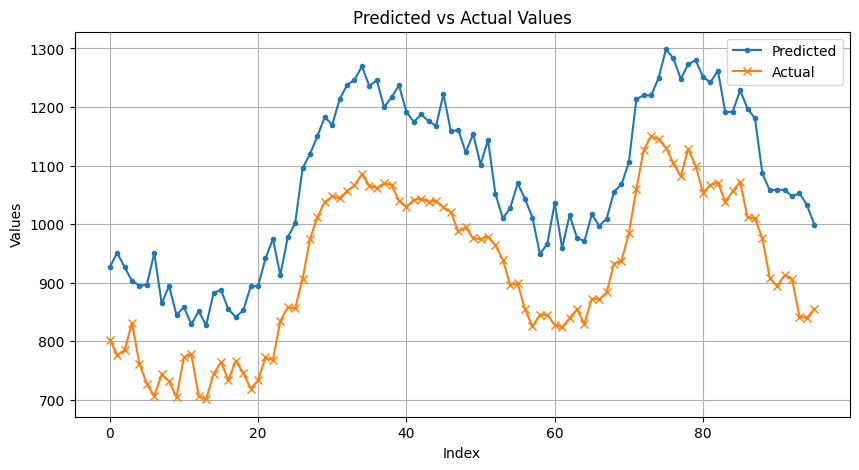

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(pred, label='Predicted', marker='.')
plt.plot(actual, label='Actual', marker='x')
plt.title('Predicted vs Actual Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

6784
MAPE 5.534978419748528


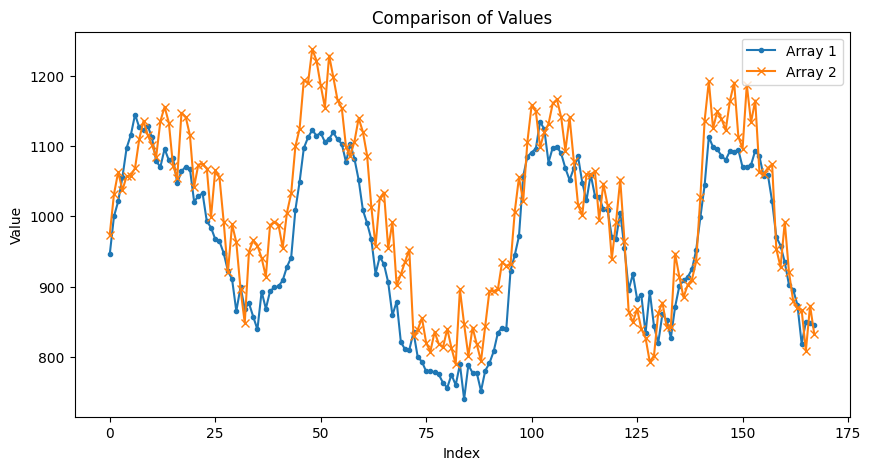

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Load the two numpy files
arr1 = np.load(r"C:\workarea\NCA\SCINet\exp\ett_results\SCINet_MyData_ftS_sl504_ll48_pl168_lr0.0005_bs32_hid128.0_s1_l3_dp0.5_invFalse_itr0\pred_scales.npy", allow_pickle=True)
arr2 = np.load(r"C:\workarea\NCA\SCINet\exp\ett_results\SCINet_MyData_ftS_sl504_ll48_pl168_lr0.0005_bs32_hid128.0_s1_l3_dp0.5_invFalse_itr0\true_scales.npy", allow_pickle=True)

# # Ensure they have the same shape
# assert arr1.shape == arr2.shape, "Arrays must be of the same shape!"

# Compute the mean squared error
mape = np.mean(np.abs((arr1 - arr2) / arr2)) * 100
print("MAPE", mape)

# Optionally, compare values, e.g., plot them
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(arr1.flatten()[-168:], label="Array 1", marker=".")
plt.plot(arr2.flatten()[-168:], label="Array 2", marker="x")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Comparison of Values")
plt.legend()
plt.show()

In [20]:
import numpy as np
import pandas as pd
import torch
import argparse
from experiments.exp_ETTh import Exp_ETTh
from sklearn.preprocessing import StandardScaler
import os

# Load your dataset
df = pd.read_csv(r'datasets\ETT-data\train.csv')

# Extract the last 96 values from the 'Value' column
past_values = list(df[-504:]["Value"])

# Define the model settings
args = {
    'model': 'SCINet',
    'data': 'MyData',
    'features': 'S',
    'seq_len': 504,
    'label_len': 48,
    'pred_len': 168,
    'hidden_size': 256,
    'stacks': 1,
    'levels': 3,
    'lr': 0.0002,
    'batch_size': 32,
    'dropout': 0.5,
    'inverse': False,
    'use_gpu': True,
    'checkpoints': 'exp/ETT_checkpoints/',
    'model_name': 'SCINet',
    'evaluate': True,
    'decompose': False,  # Add the missing 'decompose' attribute
    'num_decoder_layer': 1,  # Add the missing 'num_decoder_layer' attribute
    'concat_len': 0,  # Add the missing 'concat_len' attribute
    'groups': 1,  # Add the missing 'groups' attribute
    'kernel': 5,  # Add the missing 'kernel' attribute
    'single_step_output_One': 0,  # Add the missing 'single_step_output_One' attribute
    'positionalEcoding': False,  # Add the missing 'positionalEcoding' attribute
    'RIN': False  # Add the missing 'RIN' attribute
}

# Convert args to a namespace
args = argparse.Namespace(**args)

# Initialize the experiment
exp = Exp_ETTh(args)

# Load the trained model
setting = 'SCINet_MyData_ftS_sl504_ll48_pl168_lr0.0002_bs256_hid256.0_s1_l3_dp0.5_invFalse_itr0'
path = os.path.join(args.checkpoints, setting)
best_model_path = path + '/' + 'checkpoint.pth'
exp.model.load_state_dict(torch.load(best_model_path))
exp.model.eval()

# Convert the input data to a tensor and change its type to double
input_data = torch.tensor(past_values).double().unsqueeze(0).unsqueeze(-1)  # Shape: (1, seq_len, 1)

# Move the input data to the GPU if available
if args.use_gpu:
    input_data = input_data.cuda()

# Make predictions
with torch.no_grad():
    pred = exp.model(input_data)

SCINet(
  (blocks1): EncoderTree(
    (SCINet_Tree): SCINet_Tree(
      (workingblock): LevelSCINet(
        (interact): InteractorLevel(
          (level): Interactor(
            (split): Splitting()
            (phi): Sequential(
              (0): ReplicationPad1d((3, 3))
              (1): Conv1d(1, 256, kernel_size=(5,), stride=(1,))
              (2): LeakyReLU(negative_slope=0.01, inplace=True)
              (3): Dropout(p=0.5, inplace=False)
              (4): Conv1d(256, 1, kernel_size=(3,), stride=(1,))
              (5): Tanh()
            )
            (psi): Sequential(
              (0): ReplicationPad1d((3, 3))
              (1): Conv1d(1, 256, kernel_size=(5,), stride=(1,))
              (2): LeakyReLU(negative_slope=0.01, inplace=True)
              (3): Dropout(p=0.5, inplace=False)
              (4): Conv1d(256, 1, kernel_size=(3,), stride=(1,))
              (5): Tanh()
            )
            (P): Sequential(
              (0): ReplicationPad1d((3, 3))
         